In [41]:
import pandas as pd

df = pd.read_csv("SeoulBikeData.csv", encoding="unicode_escape")

print(df.head())
print(df.info())
print(df.describe())


         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [44]:
# Clean column names
df.columns = [
    col.strip().lower()
       .replace(' ', '_')
       .replace('(', '')
       .replace(')', '')
       .replace('°c', 'c')
       .replace('%', 'pct')
       .replace('/', '_')
       .replace('.', '')
       for col in df.columns
]

# Convert to category
categorical_cols = ['seasons', 'holiday', 'functioning_day', 'hour']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print(df[categorical_cols].dtypes)


seasons            category
holiday            category
functioning_day    category
hour               category
dtype: object


In [45]:
df['datetime'] = pd.to_datetime(df['date'], format="%d/%m/%Y") + pd.to_timedelta(df['hour'].astype(int), unit='h')

df = df.sort_values('datetime')

# Create weekday and month
df['weekday'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['datetime'].dt.month

# convert to category
df['weekday'] = df['weekday'].astype('category')
df['month'] = df['month'].astype('category')

print(df[['datetime', 'hour', 'weekday', 'month']].head())


             datetime hour weekday month
0 2017-12-01 00:00:00    0       4    12
1 2017-12-01 01:00:00    1       4    12
2 2017-12-01 02:00:00    2       4    12
3 2017-12-01 03:00:00    3       4    12
4 2017-12-01 04:00:00    4       4    12


| 图类型              | 描述                                             | 目的             |
| ---------------- | ---------------------------------------------- | -------------- |
| ⏰ 每小时租车量平均值图     | `hour` vs `rented_bike_count`                  | 看是否存在早晚高峰      |
| 📅 每星期几租车量图      | `weekday` vs `rented_bike_count`               | 看是否存在工作日/周末差异  |
| 🌡️ 温度 vs 租车量散点图 | `temperaturec` vs `rented_bike_count`          | 检查非线性关系（热/冷都少） |
| 🌧️ 雨量 vs 租车量    | `rainfallmm` vs `rented_bike_count`            | 看降雨是否明显抑制租赁    |
| ☀️ 日照 vs 租车量     | `solar_radiation_mj_m2` vs `rented_bike_count` | 看天气好坏影响有多大     |


C:\Users\Administrator.DESKTOP-PM0US2T\AppData\Local\Temp\ipykernel_29172\1039525720.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_avg = df.groupby('hour')['rented_bike_count'].mean()


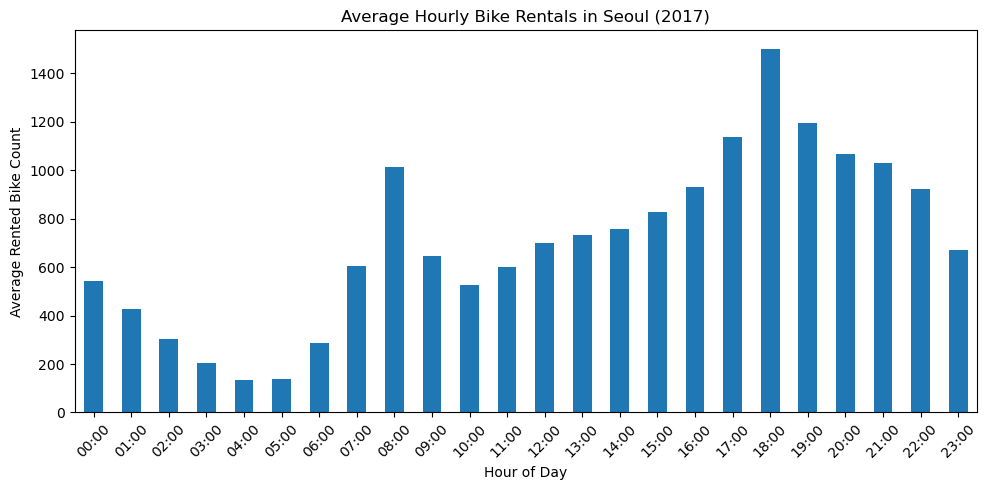

In [46]:
import matplotlib.pyplot as plt

hourly_avg = df.groupby('hour')['rented_bike_count'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar')

plt.xticks(ticks=range(24), labels=[f"{h:02d}:00" for h in range(24)], rotation=45)

plt.xlabel("Hour of Day")
plt.ylabel("Average Rented Bike Count")
plt.title("Average Hourly Bike Rentals in Seoul (2017)")

plt.tight_layout()
plt.show()


C:\Users\Administrator.DESKTOP-PM0US2T\AppData\Local\Temp\ipykernel_29172\1254875135.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = df.groupby('weekday')['rented_bike_count'].mean()


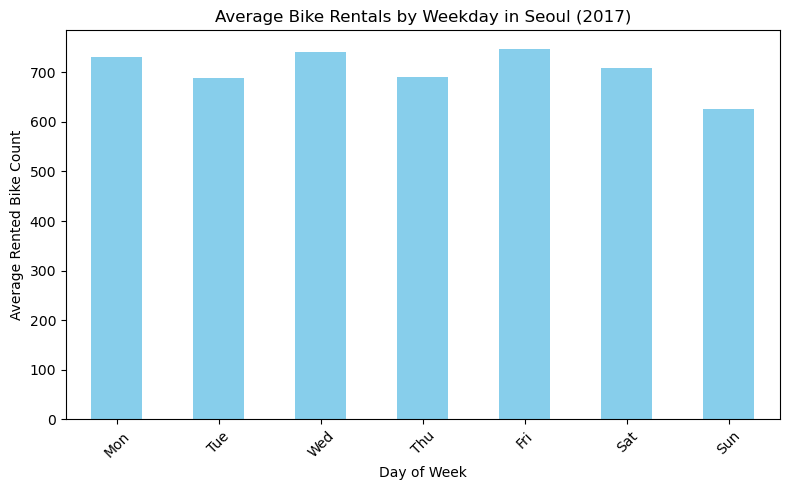

In [47]:
import matplotlib.pyplot as plt

weekday_avg = df.groupby('weekday')['rented_bike_count'].mean()

weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_avg.index = [weekday_names[int(i)] for i in weekday_avg.index]

plt.figure(figsize=(8, 5))
weekday_avg.plot(kind='bar', color='skyblue')

plt.xlabel("Day of Week")
plt.ylabel("Average Rented Bike Count")
plt.title("Average Bike Rentals by Weekday in Seoul (2017)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


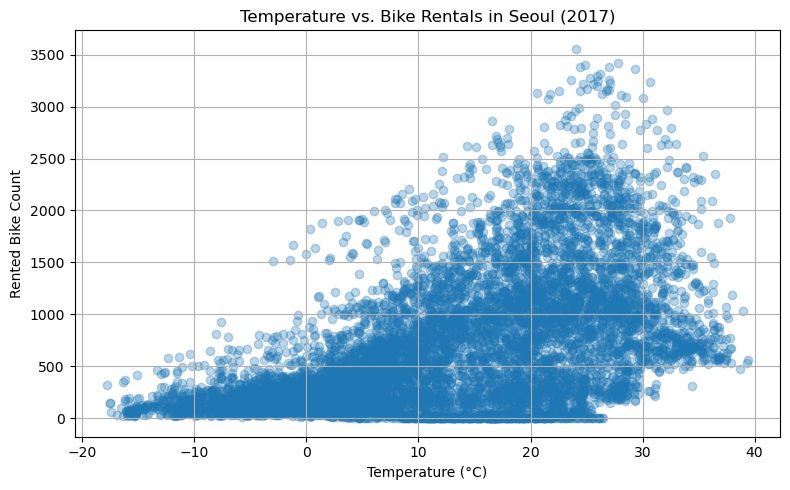

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['temperaturec'], df['rented_bike_count'], alpha=0.3)

plt.xlabel("Temperature (°C)")
plt.ylabel("Rented Bike Count")
plt.title("Temperature vs. Bike Rentals in Seoul (2017)")

plt.grid(True)
plt.tight_layout()
plt.show()


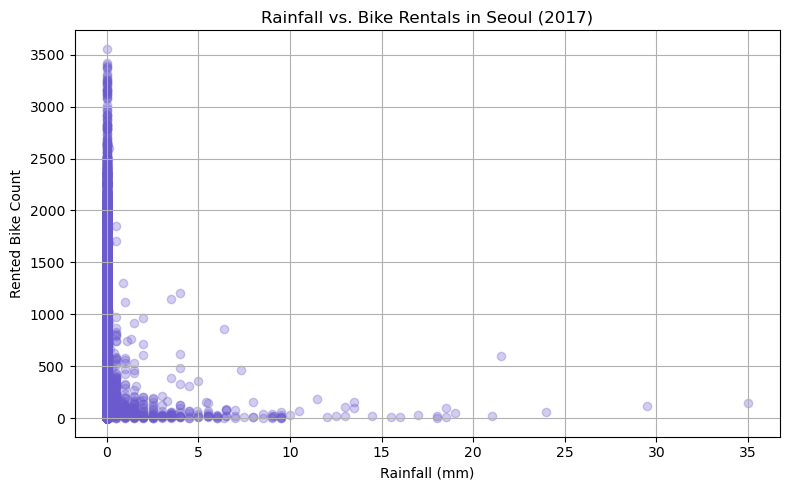

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['rainfallmm'], df['rented_bike_count'], alpha=0.3, color='slateblue')

plt.xlabel("Rainfall (mm)")
plt.ylabel("Rented Bike Count")
plt.title("Rainfall vs. Bike Rentals in Seoul (2017)")

plt.grid(True)
plt.tight_layout()
plt.show()


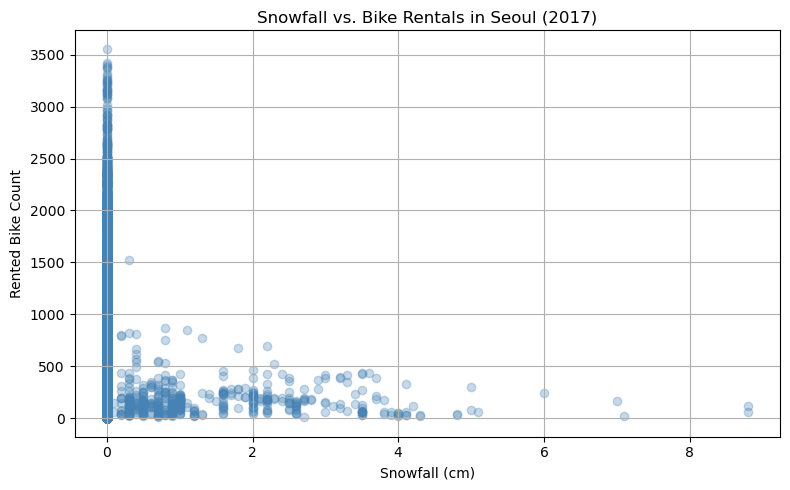

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['snowfall_cm'], df['rented_bike_count'], alpha=0.3, color='steelblue')

plt.xlabel("Snowfall (cm)")
plt.ylabel("Rented Bike Count")
plt.title("Snowfall vs. Bike Rentals in Seoul (2017)")
plt.grid(True)
plt.tight_layout()
plt.show()


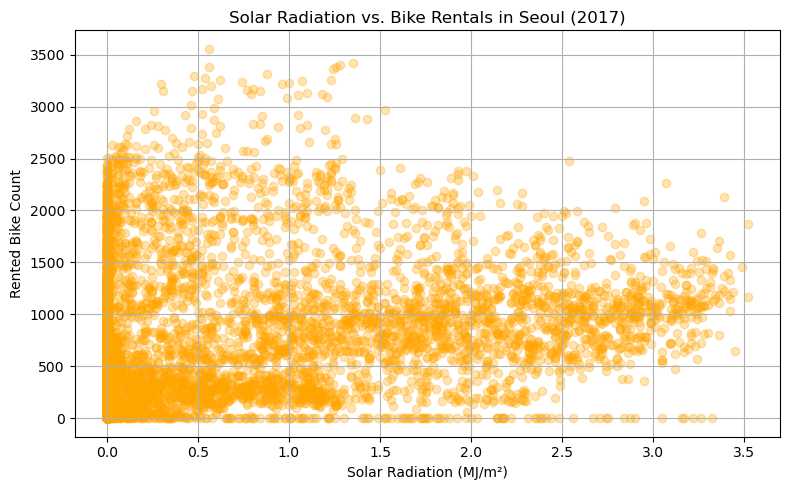

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['solar_radiation_mj_m2'], df['rented_bike_count'], alpha=0.3, color='orange')

plt.xlabel("Solar Radiation (MJ/m²)")
plt.ylabel("Rented Bike Count")
plt.title("Solar Radiation vs. Bike Rentals in Seoul (2017)")

plt.grid(True)
plt.tight_layout()
plt.show()


| 变量               | 作用方式    | 推荐做法                         |
| ---------------- | ------- | ---------------------------- |
| hour             | 日内周期    | categorical/dummy            |
| weekday          | 周周期     | categorical；也可生成 is\_weekend |
| temperature      | 非线性峰值   | 添加二次项或 spline                |
| rainfall         | 极强门槛效应  | 二分类更合理（是否有雨）                 |
| solar\_radiation | 弱正相关或冗余 | 先保留，后验检验 VIF                 |


1. 生成衍生变量：

    - is_raining = rainfallmm > 0

    - temp² = temperaturec ** 2

    - is_weekend = weekday in [5,6]

2. 建模初版：

    - 用多元线性回归做 baseline

    - 检查残差分布、方差不齐、是否 Poisson 更合适

3. 检查共线性：

    - 计算 VIF，避免冗余解释变量（温度 + 日照）

4. 可选进一步图表（仅在需要）：

    - 交互效应图：如 hour × weekday、temp × is_raining

    - 节假日 vs 平日对比

    - 每月趋势（季节性）

In [ ]:
# One-hot encoding for seasons
df_onehot = 1. * pd.get_dummies(df['seasons'])
df = pd.concat([df, df_onehot], axis=1)


# define hour bins
bins = [-1, 6, 9, 17, 19, 24]
labels = ['0-6_low', '7-9_peak', '10-17_rising', '18-19_high', '20-24_decline']

# Create binned categorical feature
df['time_bin'] = pd.cut(
    df['hour'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)
df_hour_onehot = 1. * pd.get_dummies(df['time_bin'])
df = pd.concat([df, df_hour_onehot], axis=1)

# Binary indicator for rainfall (1 if rainfall > 0 mm)
df['is_raining'] = (df['rainfallmm'] > 0).astype(int)

# Binary indicator for snowfall (1 if snowfall > 0 cm)
df['is_snowing'] = (df['snowfall_cm'] > 0).astype(int)

# Squared term for temperature to capture nonlinear effects
df['temperaturec_squared'] = df['temperaturec'] ** 2

# Binary indicator for weekend (Saturday=5 or Sunday=6)
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# Binary indicator for holiday
df['is_holiday'] = (df['holiday'] != 'No Holiday').astype(int)

# Binary indicator for working day (weekday and functioning)
df['is_working_day'] = ((df['functioning_day'] == 'Yes') & (df['weekday'].isin([0,1,2,3,4]))).astype(int)

# Check transformed columns
print(df[['hour', 'weekday', 'temperaturec', 'temperaturec_squared', 
          'rainfallmm', 'is_raining', 'is_snowing', 'is_weekend', 'is_holiday', 
          'is_working_day']].head())


  hour weekday  temperaturec  temperaturec_squared  rainfallmm  is_raining  \
0    0       4          -5.2                 27.04         0.0           0   
1    1       4          -5.5                 30.25         0.0           0   
2    2       4          -6.0                 36.00         0.0           0   
3    3       4          -6.2                 38.44         0.0           0   
4    4       4          -6.0                 36.00         0.0           0   

   is_snowing  is_weekend  is_holiday  is_working_day  
0           0           0           0               1  
1           0           0           0               1  
2           0           0           0               1  
3           0           0           0               1  
4           0           0           0               1  


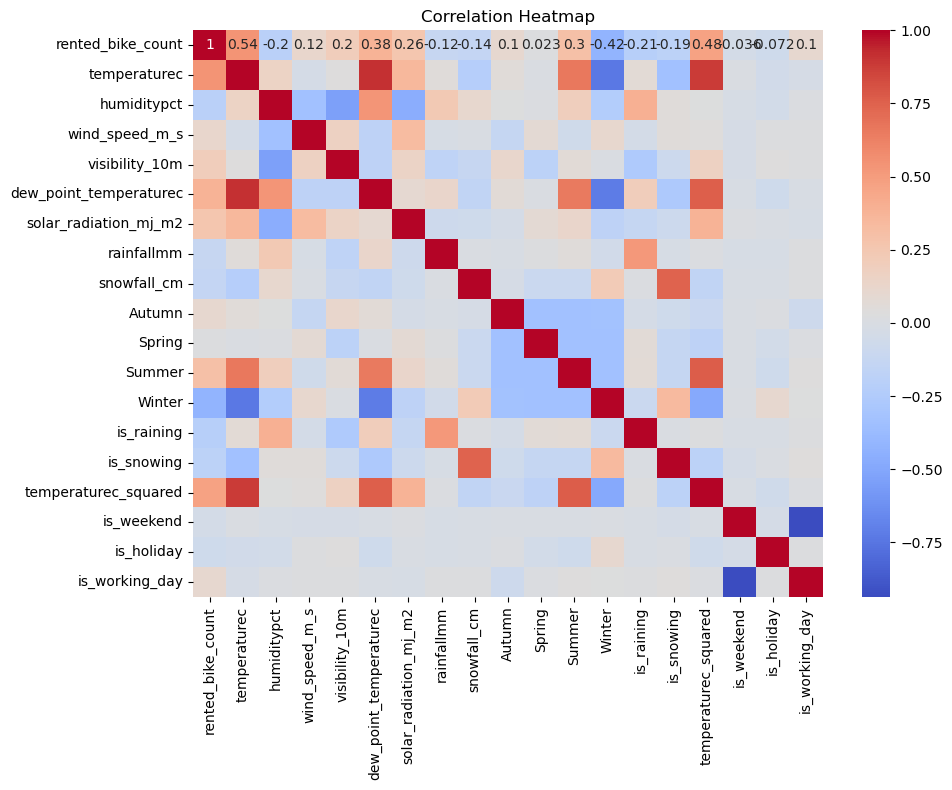

In [53]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


c:\Users\Administrator.DESKTOP-PM0US2T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


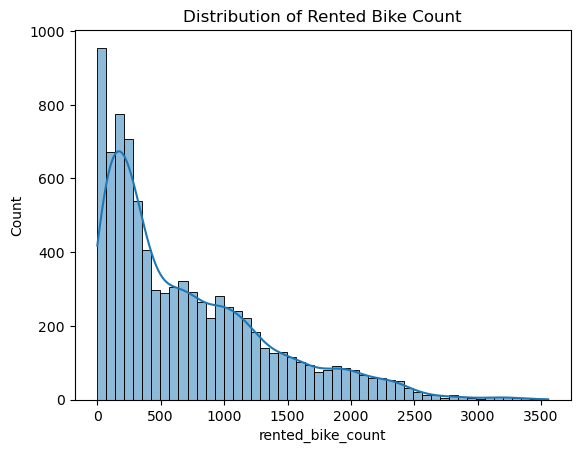

In [54]:
import seaborn as sns
sns.histplot(df['rented_bike_count'], bins=50, kde=True)
plt.title("Distribution of Rented Bike Count")
plt.show()


C:\Users\Administrator.DESKTOP-PM0US2T\AppData\Local\Temp\ipykernel_29172\3586806373.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df['rented_bike_count'] == 0).groupby(df['hour']).mean().plot(kind='bar')


Text(0.5, 1.0, 'Proportion of Zero Rentals by Hour')

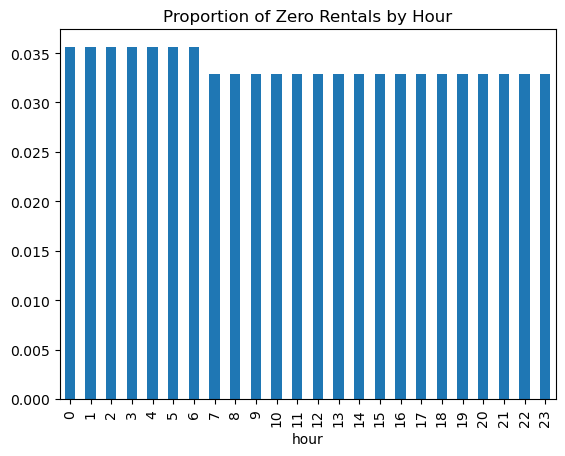

In [55]:
(df['rented_bike_count'] == 0).groupby(df['hour']).mean().plot(kind='bar')
plt.title("Proportion of Zero Rentals by Hour")


In [19]:
import statsmodels.api as sm

In [59]:
X = df[[
    'temperaturec', 'humiditypct', 'wind_speed_m_s', 'visibility_10m',
    'dew_point_temperaturec', 'solar_radiation_mj_m2', 'rainfallmm', 'snowfall_cm',
    'is_raining', 'is_snowing', 'temperaturec_squared',
    'is_weekend', 'is_holiday', 'is_working_day', 'Autumn',
       'Spring', 'Summer', 'Winter'
]]

Y = df['rented_bike_count']

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [60]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      rented_bike_count   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     493.1
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        04:41:49   Log-Likelihood:                -66155.
No. Observations:                8760   AIC:                         1.323e+05
Df Residuals:                    8742   BIC:                         1.325e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -195

In [58]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temperaturec', 'humiditypct',
       'wind_speed_m_s', 'visibility_10m', 'dew_point_temperaturec',
       'solar_radiation_mj_m2', 'rainfallmm', 'snowfall_cm', 'seasons',
       'holiday', 'functioning_day', 'datetime', 'weekday', 'month', 'Autumn',
       'Spring', 'Summer', 'Winter', 'is_raining', 'is_snowing',
       'temperaturec_squared', 'is_weekend', 'is_holiday', 'is_working_day'],
      dtype='object')

In [57]:
df['Summer']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Summer, Length: 8760, dtype: float64

In [12]:
df.to_csv("SeoulBikeDataClean.csv", index=False)